# 4 无标度网络

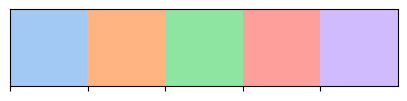

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns

# I set the random seed so the notebook 
# produces the same results every time.
np.random.seed(17)

# node colors for drawing networks
colors = sns.color_palette('pastel', 5)
sns.palplot(colors)
sns.set_palette(colors)

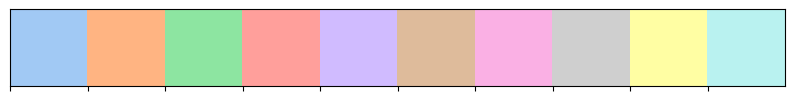

In [2]:
colors = sns.color_palette('pastel', 10)
sns.palplot(colors)
sns.set_palette(colors)

## 4.1 社交网络数据

- 定义一个函数用于读取数据文件，每一行包含一条边，边用节点对表示。

In [3]:
def read_graph(filename):
    G = nx.Graph()
    array = np.loadtxt(filename, dtype=int)
    G.add_edges_from(array)
    return G

- 读取 Facecook 数据集（可以从 [SNAP](https://snap.stanford.edu/data/egonets-Facebook.html)下载）

In [4]:
# https://snap.stanford.edu/data/facebook_combined.txt.gz

fb = read_graph(r'C:\Users\Boyang  Du\Desktop\America works\facebook_combined.txt.gz')
n = len(fb)
m = len(fb.edges())
n, m

(4039, 88234)

- 对于较大的图，集聚系数和路径长度计算非常慢，花费的时间与 $nk^2$ 成正比，其中 $n$ 是节点数，$k$ 是每个节点连接到的相邻节点的数量。
- 幸运的是，NetworkX提供了一个函数，可以通过随机抽样估计集聚系数和路径长度。
- 可以使用如下代码调用该函数：

In [5]:
from networkx.algorithms.approximation import average_clustering
average_clustering(fb, trials=1000)

0.612

增加样本至2000，集聚系数增长至0.613

In [6]:
average_clustering(fb, trials=2000)

0.6005

增加样本至3000，这说明集聚系数大致为0.613

In [7]:
average_clustering(fb, trials=3000)

0.5933333333333334

- 下面的函数对路径长度做了类似的处理。

In [8]:
def sample_path_lengths(G, nodes=None, trials=1000):
    """Choose random pairs of nodes and compute the path length between them.

    G: Graph
    nodes: list of nodes to choose from
    trials: number of pairs to choose

    returns: list of path lengths
    """
    if nodes is None:
        nodes = list(G)
    else:
        nodes = list(nodes)
        
    pairs = np.random.choice(nodes, (trials, 2))
    lengths = [nx.shortest_path_length(G, *pair) 
               for pair in pairs]
    return lengths

def estimate_path_length(G, nodes=None, trials=1000):
    return np.mean(sample_path_lengths(G, nodes, trials))

- 测试平均集聚系数

In [9]:
C = average_clustering(fb)
C

0.6

多尝试几种不同的图

In [10]:
C2 = average_clustering(fb)
C2

0.627

In [11]:
C3 = average_clustering(fb)
C3

0.616

In [12]:
C4 = average_clustering(fb)
C4

0.621

可以发现集聚系数的平均值大致在0.6附近

In [13]:
list_clustering=[]
def average_cluster(N):
    i=1
    S=0
    while i<=N:
        C=average_clustering(fb)
        S=S+C
        i=i+1
    average=S/N
    return average

In [14]:
average_cluster(30)

0.6020333333333332

- 测试平均路径长度

In [15]:
L = estimate_path_length(fb)
L

3.717

以下为100次测试的平均值得出的平均路程长度

In [16]:
def average_pathlength(N):
    i=1
    S=0
    while i<=10:
        L=estimate_path_length(fb)
        S=S+L
        i=i+1
    average2=S/10
    return average2

In [17]:
average_pathlength(10)

3.6809

## 4.2 WS 模型

- 我们构建和 Facebook 网络具有相同节点个数 $n=4039$ 和平均度 $\langle k \rangle=44$ 的WS图。

In [18]:
n = len(fb)
m = len(fb.edges())
k = int(round(2*m/n))
k

44

- 当 `p=0` 时我们得到一个环格。

In [19]:
lattice = nx.watts_strogatz_graph(n, k, p=0)
len(lattice), len(lattice.edges())

(4039, 88858)

以下为$p=0.5$的情况

In [20]:
latticep_1 = nx.watts_strogatz_graph(n, k, p=0.5)
len(latticep_1), len(latticep_1.edges())

(4039, 88858)

- 计算集聚系数

In [21]:
C, average_clustering(lattice)

(0.6, 0.714)

平均集聚系数大约在0.605左右

In [22]:
average_cluster(100)

0.6054599999999999

- 计算平均路径长度

In [23]:
L, estimate_path_length(lattice)

(3.717, 44.868)

In [24]:
def average_pathlength2(N):
    i=1
    S=0
    while i<=N:
        L=estimate_path_length(lattice)
        S=S+L
        i=i+1
    average2=S/N
    return average2

In [25]:
average_pathlength2(1)

47.798

- 当 `p=1` 时我们得到一个随机图。

In [26]:
random_graph = nx.watts_strogatz_graph(n, k, p=1)

- 计算集聚系数

In [27]:
C, average_clustering(random_graph)

(0.6, 0.009)

In [28]:
def average_cluster2(N):
    i=1
    S=0
    while i<=N:
        C=average_clustering(random_graph)
        S=S+C
        i=i+1
    average=S/N
    return average

In [29]:
average_cluster2(10)

0.010199999999999997

- 计算平均路径长度

In [30]:
L, estimate_path_length(random_graph)

(3.717, 2.617)

In [31]:
def average_pathlength3(N):
    i=1
    S=0
    while i<=N:
        L=estimate_path_length(random_graph)
        S=S+L
        i=i+1
    average2=S/N
    return average2

In [32]:
average_pathlength3(3)

2.603

- 通过反复试验并试错，发现当 $p=0.05$ 时，可以得到一个高集聚短路径长度的WS图。

In [33]:
ws = nx.watts_strogatz_graph(n, k, 0.05, seed=15)

- 计算集聚系数

In [34]:
C, average_clustering(ws)

(0.6, 0.657)

In [35]:
def average_clusterws(N):
    i=1
    S=0
    while i<=N:
        C=average_clustering(ws)
        S=S+C
        i=i+1
    average=S/N
    return average

In [36]:
average_clusterws(100)

0.6291700000000002

- 计算平均路径长度

In [37]:
L, estimate_path_length(ws)

(3.717, 3.224)

In [38]:
def average_pathlengthws(N):
    i=1
    S=0
    while i<=N:
        L=estimate_path_length(ws)
        S=S+L
        i=i+1
    average2=S/N
    return average2

In [39]:
average_pathlengthws(10)

3.2264000000000004

So that seems good so far.

## 4.3 度

- 我们研究一下原始数据集和WS模型的度分布。
- 如下函数返回一个度列表。

In [40]:
def degrees(G):
    """List of degrees for nodes in `G`.
    
    G: Graph object
    
    returns: list of int
    """
    return [G.degree(u) for u in G]

- 计算原始数据集和WS模型的平均度。

In [41]:
np.mean(degrees(fb)), np.mean(degrees(ws))

(43.69101262688784, 44.0)

- 计算标准差。

In [42]:
np.std(degrees(fb)), np.std(degrees(ws))

(52.41411556737521, 1.4309215628189869)

- 问题出在哪里？
- 我们研究下它们的度分布情况。
- 测试

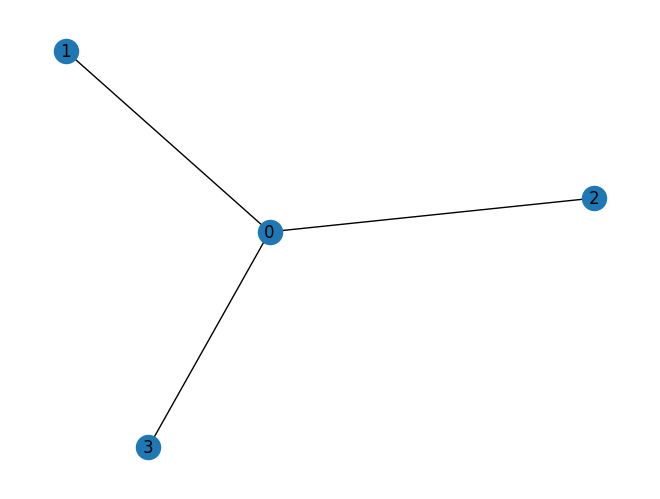

In [43]:
G = nx.Graph()
G.add_edge(1, 0)
G.add_edge(2, 0)
G.add_edge(3, 0)
nx.draw(G, with_labels=True)

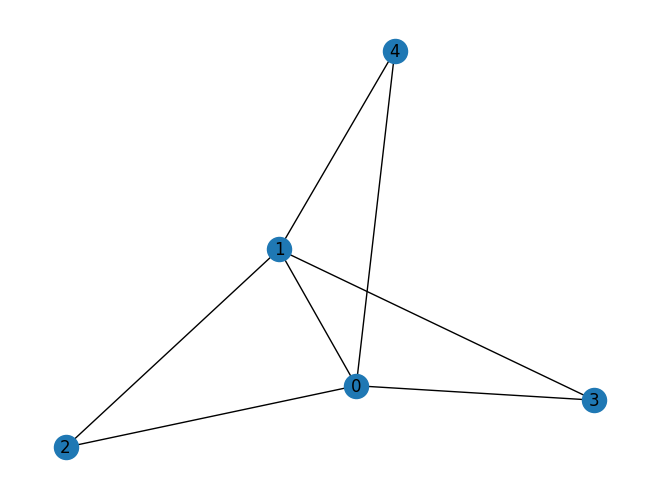

In [59]:
G2 = nx.Graph()
G2.add_edge(1, 0)
G2.add_edge(2, 0)
G2.add_edge(3, 0)
G2.add_edge(4, 0)
G2.add_edge(2, 1)
G2.add_edge(3, 1)
G2.add_edge(4, 1)
nx.draw(G2, with_labels=True)

- 度列表

In [45]:
degrees(G)

[1, 3, 1, 1]

In [60]:
degrees(G2)

[4, 4, 2, 2, 2]

- 为了计算度分布，我们使用 `empiricaldist` 的 `Pmf` 类。

In [46]:
from empiricaldist import Pmf

- 测试

In [47]:
pmf = Pmf.from_seq(degrees(G))
pmf

,probs
1,0.75
3,0.25


In [61]:
pmf2 = Pmf.from_seq(degrees(G2))
pmf2

,probs
2,0.6
4,0.4


- 可视化

Text(0, 0.5, 'Pmf')

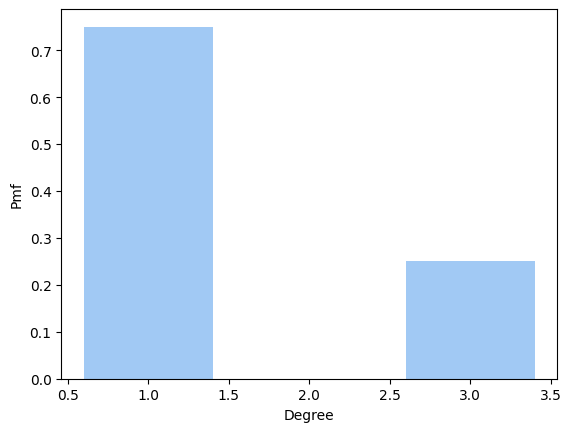

In [48]:
pmf.bar()
plt.xlabel('Degree')
plt.ylabel('Pmf')

Text(0, 0.5, 'Pmf2')

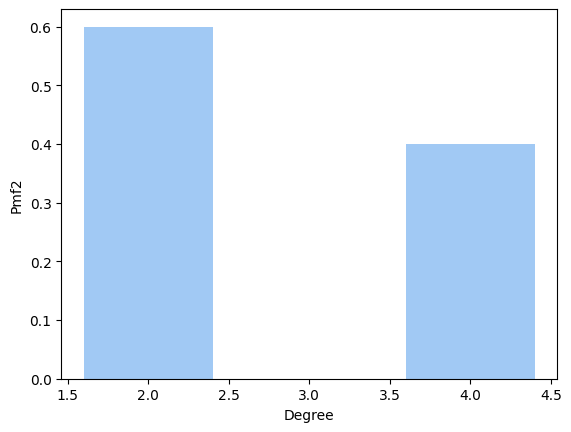

In [62]:
pmf2.bar()
plt.xlabel('Degree')
plt.ylabel('Pmf2')

- 我们使用 `Pmf` 计算均值和标准差。

In [49]:
pmf_fb = Pmf.from_seq(degrees(fb))
pmf_fb.mean(), pmf_fb.std()

(43.69101262688785, 52.41411556737521)

In [50]:
pmf_ws = Pmf.from_seq(degrees(ws))
pmf_ws.mean(), pmf_ws.std()

(44.00000000000001, 1.4309215628189869)

- 也可以使用 `Pmf` 检查度为 1 的节点的比例。

In [51]:
pmf_fb(1), pmf_ws(1)

(0.018568952711067097, 0)

检查度从1到10的比例

In [52]:
def fbdegree1toN(N):
    list=[]
    i=1
    while i<=N:
        list.append(pmf_fb(i))
        i=i+1
    return list

In [53]:
def wsdegree1toN(N):
    list=[]
    i=1
    while i<=N:
        list.append(pmf_ws(i))
        i=i+1
    return list

In [54]:
fbdegree1toN(10)

[0.018568952711067097,
 0.024263431542461005,
 0.0230255013617232,
 0.024511017578608567,
 0.0230255013617232,
 0.024263431542461005,
 0.024263431542461005,
 0.027482050012379303,
 0.02475860361475613,
 0.02352067343401832]

In [55]:
wsdegree1toN(10)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

- 绘制Facebook网络数据集和WS模型中节点的度的分布图。

Text(0.5, 0, 'Degree')

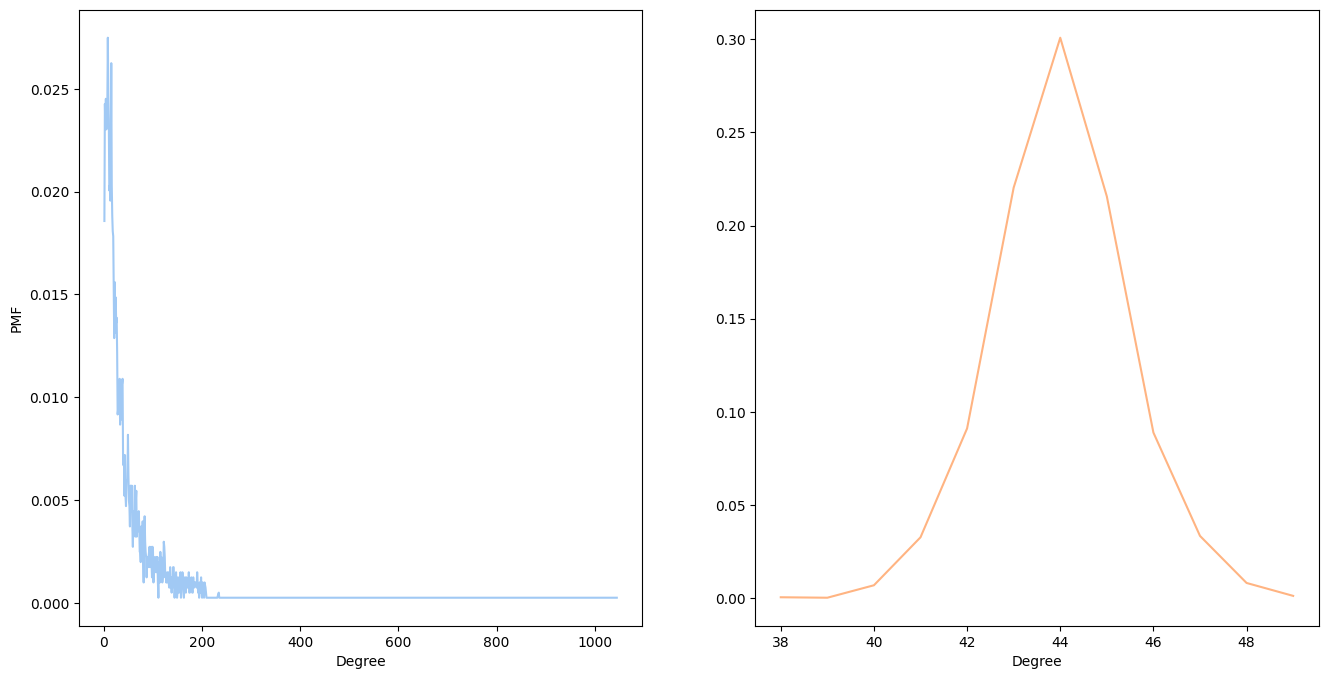

In [64]:
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
pmf_fb.plot(label='Facebook', color='C0')
plt.xlabel('Degree')
plt.ylabel('PMF')

plt.subplot(1,2,2)
pmf_ws.plot(label='WS graph', color='C1')
plt.xlabel('Degree')
# plt.ylabel('Pmf')


- 在双对数坐标下绘制PMF图像。

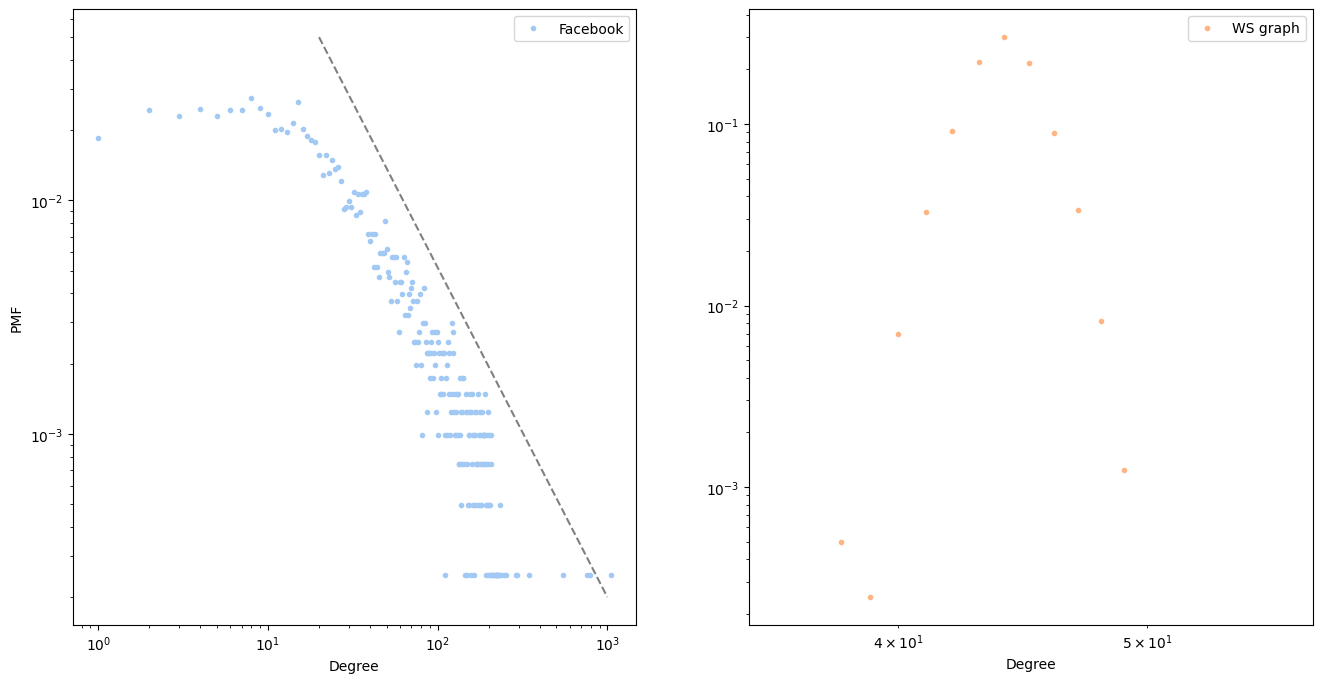

In [63]:
plt.figure(figsize=(16,8))
options = dict(ls='', marker='.')

plt.subplot(1,2,1)
plt.plot([20, 1000], [5e-2, 2e-4], color='gray', linestyle='dashed')

pmf_fb.plot(label='Facebook', color='C0', **options)
plt.xlabel('Degree')
plt.ylabel('PMF')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
pmf_ws.plot(label='WS graph', color='C1', **options)
plt.xlabel('Degree')
plt.xscale('log')
plt.yscale('log')
plt.axis(xmin=35, xmax=58)
plt.legend(loc="upper right")
